In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
linkedin_data = pd.read_csv("linkedin-reviews.csv")

# Display the first few rows of the dataset
print(linkedin_data.head())

                                              Review  Rating
0  Does absolutely nothing for a LinkedIn beginne...       1
1                            Force close(galaxy tab)       1
2  Slow and it tries to upload your contacts with...       1
3  Add ability to customize the profile and move ...       4
4  Good app, but it's a pain that it's not possib...       4


In [40]:
pip install ydata_profiling

  Obtaining dependency information for ydata_profiling from https://files.pythonhosted.org/packages/49/03/04ce11264d78f7a9f1025a13f8a078aa18eb2a9c628bc0a9a9c18673062c/ydata_profiling-4.7.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/ed/76/9a17032880ed27f2dbd490c77a3431cbc80f47ba81534131de3c2846e736/pydantic-2.7.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     ----------- --------------------------- 30.7/107.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 107.3/107.3 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/packages/7c/bf/612b24e711ae25dea9af19b9304634b8949faa0b035fad47e8bcadf62f59/visions-0.7.6-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.7.1 which is incompatible.


In [41]:
import pandas as pd
from ydata_profiling import ProfileReport

#df = pd.read_csv('linkedin_data.csv')
profile = ProfileReport(linkedin_data, title="Profiling Report")


In [42]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
print(linkedin_data.shape)

(702, 2)


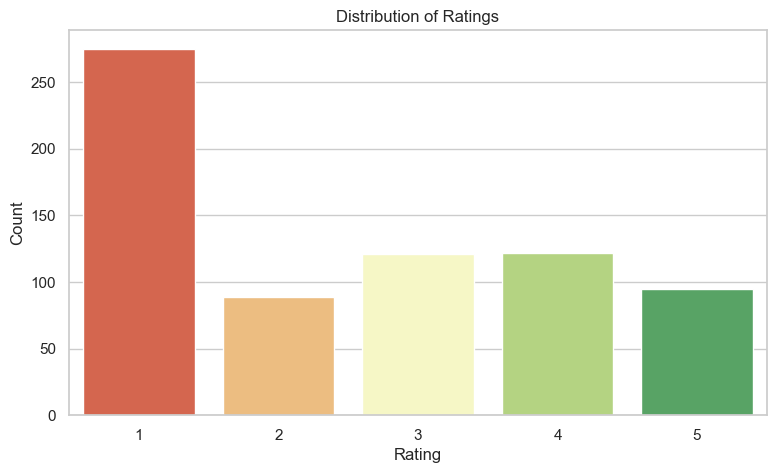

In [29]:
# Plotting the distribution of ratings
sns.set(style="whitegrid")
# colors = ['lightseagreen', 'yellow','red','blue','black']
plt.figure(figsize=(9, 5))
sns.countplot(data=linkedin_data, x='Rating',palette='RdYlGn')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

1. The distribution rating shows that nearly 40% of the users have given a rating of 1
2. Nearly equal number of users have rated the app with a rating of 3 and 4

C:\Users\arush\AppData\Local\Temp\ipykernel_13008\4171706372.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(linkedin_data['Review Length'], bins=50, kde=True, palette = 'RdPu')


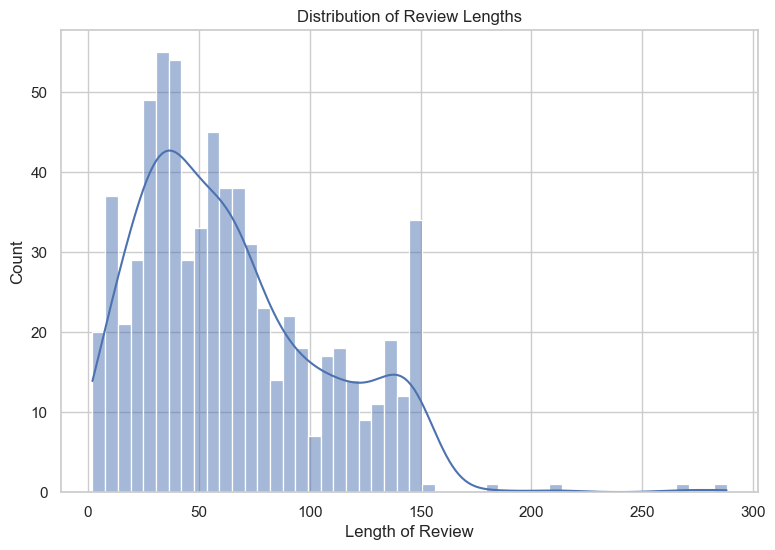

In [32]:
# Calculating the length of each review
linkedin_data['Review Length'] = linkedin_data['Review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
#colors = sns.color_palette('RdPu', 10)
sns.histplot(linkedin_data['Review Length'], bins=50, kde=True, palette = 'RdPu')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

1. Majority of the people prefer to write a review in less than 100 words

In [9]:
#pip install TextBlob

  Obtaining dependency information for TextBlob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --- ----------------------------------- 51.2/626.3 kB 650.2 kB/s eta 0:00:01
   -------- ------------------------------- 133.1/626.3 kB 1.1 MB/s eta 0:00:01
   ------------- -------------------------- 204.8/626.3 kB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/626.3 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 378.9/626.3 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 460.8/626.3 kB 1.5 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/626.3 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.6 MB/s eta 0:00:00
Note: you

In [21]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity >=-1 and sentiment.polarity <-0.5 :
        return 'Very Negative'
    elif sentiment.polarity >=-0.5 and sentiment.polarity <0 :
        return 'Negative'
    elif sentiment.polarity >0 and sentiment.polarity <=0.5 :
        return 'Positive'
    elif sentiment.polarity >0.5 and sentiment.polarity <=1 :
        return 'Very Positive'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
linkedin_data['Sentiment'] = linkedin_data['Review'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
print(linkedin_data.head())

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  Sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


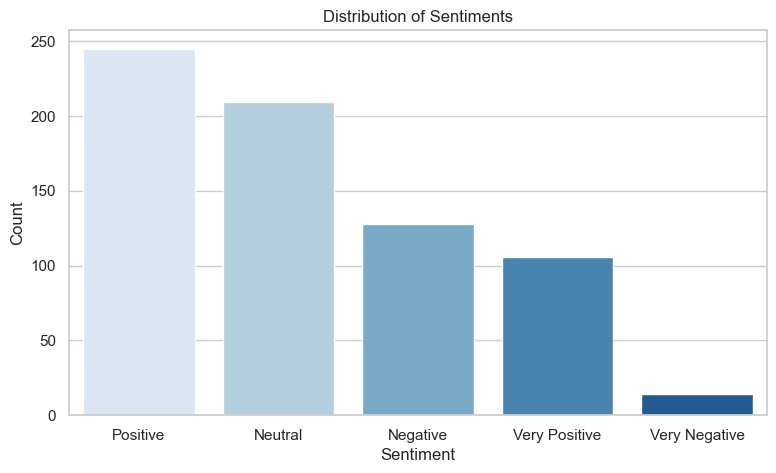

In [36]:
# Analyzing the distribution of sentiments
sentiment_distribution = linkedin_data['Sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette = 'Blues')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

1. Despite 40 percent of users have poorly rated the app(rating=1) yet approximately 65% of users have have opted for using positive or neutral words in their reviews. This shows that the rating is not a direct reflection of the words used.
2. Only a  small fraction of users (Approximately 16%) have opted for using extreme words(inclusive of both very positive and very negative) for expressing their viewpoint.



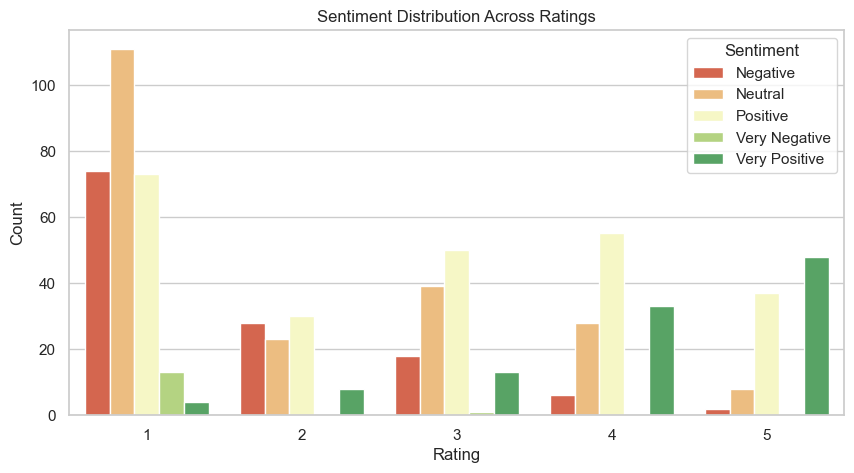

In [37]:
# Sentiment distribution across ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=linkedin_data, x='Rating', hue='Sentiment', palette='RdYlGn')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

1. Relatively,most Neutral words have been utilised by users who have rated the app with a rating of 1
2. Users who have rated 1 are the only category that fetch some very negative words in their reviews(ratings are proportional to the usage of words)
3. The usage of very positive words is proportional to the rating i.e, frequency increases with increased rating
4. The usage of negative words is inversely proportional to the rating i.e, frequency decreases with increased rating, however no such conclusive pattern can be drawn for Positive words

In [14]:
#pip install WordCloud

  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 667.8 kB/s eta 0:00:01
   --------------- ------------------------ 112.6/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


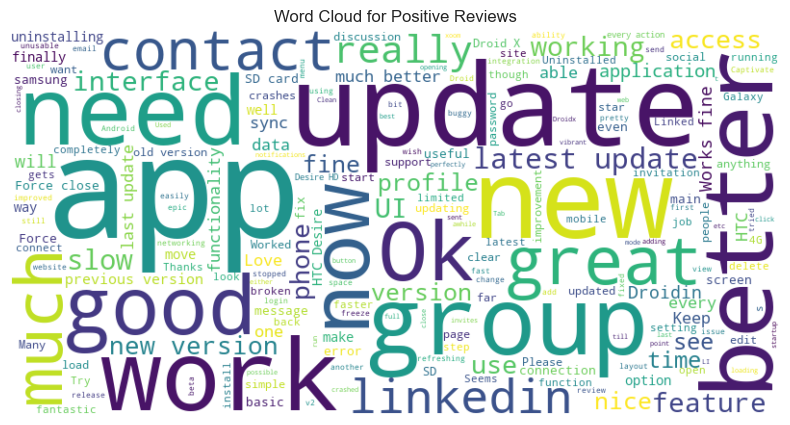

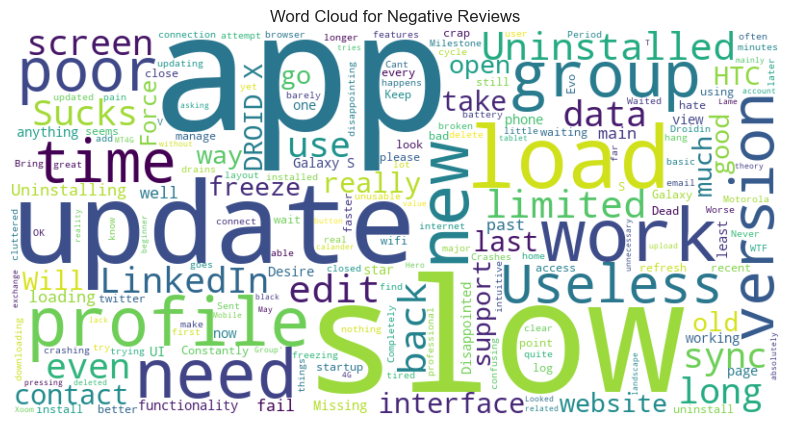

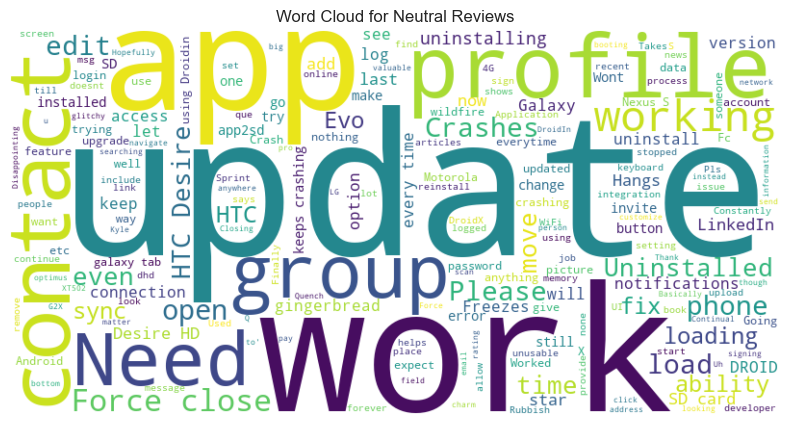

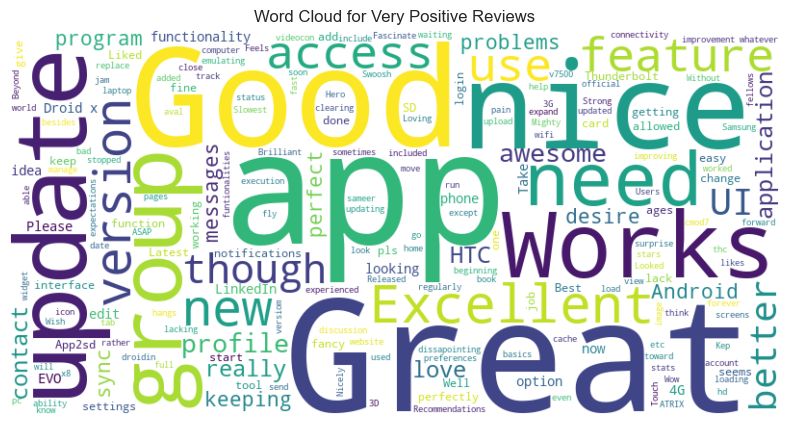

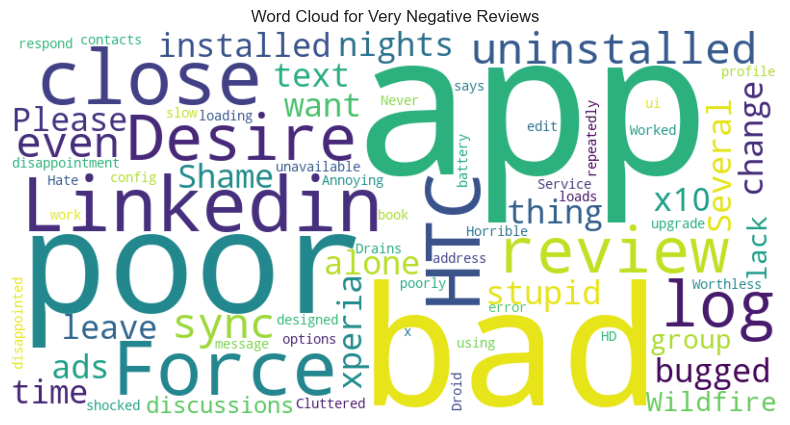

In [26]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
#  This line concatenates all the reviews that match the given sentiment. It assumes there is a DataFrame named linkedin_data
# containing reviews with columns 'Sentiment' and 'Review'. It filters the DataFrame to select only those reviews with the 
# specified sentiment, retrieves the 'Review' column, and joins them into a single string separated by spaces.
    text = ' '.join(review for review in linkedin_data[linkedin_data['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral','Very Positive','Very Negative']:
    generate_word_cloud(sentiment)

The users who have very negative sentiment attached to the app frequently used negative adjectives to show their immense dissatisfaction with the app without providing a reason for the same however the users who have associated themselves with negative sentiment still have hopes for improvement and hence provide the scope of improvement areas